In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('survey_results_public.csv')

In [5]:
df.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [6]:
df.shape

(49191, 172)

In [7]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
EdLevel                 1042
Employment               852
                       ...  
AIAgentExtWrite        48332
AIHuman                19997
AIOpen                 26651
ConvertedCompYearly    25244
JobSat                 22521
Length: 172, dtype: int64

In [8]:
import pandas as pd

# % missing per column
missing_pct = df.isna().mean().sort_values(ascending=False)

missing_pct.head(20)


AIAgentObsWrite         0.994633
SOTagsWant Entry        0.991259
SOTagsHaveEntry         0.990689
AIModelsWantEntry       0.990344
AIAgentOrchWrite        0.990283
JobSatPoints_15_TEXT    0.986502
AIAgentKnowWrite        0.984428
AIModelsHaveEntry       0.984225
SO_Actions_15_TEXT      0.983269
AIAgentExtWrite         0.982537
CommPlatformWantEntr    0.975931
CommPlatformHaveEntr    0.969995
DatabaseWantEntry       0.968836
OfficeStackWantEntry    0.967128
TechOppose_15_TEXT      0.966518
TechEndorse_13_TEXT     0.959159
DevEnvWantEntry         0.957065
DatabaseHaveEntry       0.956293
OfficeStackHaveEntry    0.947368
WebframeWantEntry       0.946535
dtype: float64

In [9]:
min_non_null_ratio = 0.60
min_non_null = int(min_non_null_ratio * len(df))

df_reduced = df.dropna(axis=1, thresh=min_non_null)
print("Before:", df.shape, "After:", df_reduced.shape)


Before: (49191, 172) After: (49191, 65)


In [10]:
min_answer_ratio = 0.20
min_answers = int(min_answer_ratio * df_reduced.shape[1])

df_reduced = df_reduced.dropna(axis=0, thresh=min_answers)
print("After dropping empty-ish rows:", df_reduced.shape)


After dropping empty-ish rows: (42506, 65)


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_cols = df_reduced.select_dtypes(include="number").columns
cat_cols = df_reduced.select_dtypes(exclude="number").columns

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ]
)


In [12]:
import numpy as np

missing_pct = df_reduced.isna().mean()

# Drop columns with too much missingness
max_missing = 0.80
keep_cols = missing_pct[missing_pct <= max_missing].index

df2 = df_reduced[keep_cols].copy()
print("Before:", df_reduced.shape, "After:", df2.shape)

# sanity check: worst remaining columns
df2.isna().mean().sort_values(ascending=False).head(10)


Before: (42506, 65) After: (42506, 65)


OfficeStackAsyncHaveWorkedWith    0.297558
CommPlatformHaveWorkedWith        0.292712
AIModelsChoice                    0.288665
SOFriction                        0.275702
LearnCode                         0.271068
DevEnvsChoice                     0.268880
WebframeChoice                    0.266151
PlatformChoice                    0.264551
OpSysPersonal use                 0.260881
AIFrustration                     0.258411
dtype: float64

In [14]:
df2.isnull().sum()

ResponseId           0
MainBranch           0
Age                  0
EdLevel             99
Employment           0
                 ...  
AIAcc             9209
AIComplex         9223
AIFrustration    10984
AIAgents         10587
AIAgentChange    10828
Length: 65, dtype: int64

In [16]:
df2.shape


(42506, 65)

In [15]:
df2.shape
df2.columns.tolist()


['ResponseId',
 'MainBranch',
 'Age',
 'EdLevel',
 'Employment',
 'EmploymentAddl',
 'WorkExp',
 'LearnCodeChoose',
 'LearnCode',
 'LearnCodeAI',
 'YearsCode',
 'DevType',
 'OrgSize',
 'ICorPM',
 'RemoteWork',
 'PurchaseInfluence',
 'TechEndorseIntro',
 'TechEndorse_1',
 'TechEndorse_2',
 'TechEndorse_3',
 'TechEndorse_4',
 'TechEndorse_5',
 'TechEndorse_6',
 'TechEndorse_7',
 'TechEndorse_8',
 'TechEndorse_9',
 'TechEndorse_13',
 'TechOppose_1',
 'TechOppose_2',
 'TechOppose_3',
 'TechOppose_5',
 'TechOppose_7',
 'TechOppose_9',
 'TechOppose_11',
 'TechOppose_13',
 'TechOppose_16',
 'TechOppose_15',
 'Industry',
 'AIThreat',
 'NewRole',
 'Country',
 'Currency',
 'LanguageChoice',
 'LanguageHaveWorkedWith',
 'DatabaseChoice',
 'PlatformChoice',
 'WebframeChoice',
 'DevEnvsChoice',
 'OpSysPersonal use',
 'OfficeStackAsyncHaveWorkedWith',
 'CommPlatformHaveWorkedWith',
 'AIModelsChoice',
 'SOAccount',
 'SOVisitFreq',
 'SODuration',
 'SOPartFreq',
 'SOComm',
 'SOFriction',
 'AISelect',
 '

In [17]:
import numpy as np


max_missing = 0.80
missing_pct = df_reduced.isna().mean()
df2 = df_reduced.loc[:, missing_pct <= max_missing].copy()

# 2) feature selection (v1)
feature_cols = [
    'MainBranch','Age','EdLevel','Employment','WorkExp','YearsCode','DevType',
    'OrgSize','ICorPM','RemoteWork','Industry','Country',
    'SOVisitFreq','SODuration','SOPartFreq','SOComm','SOFriction',
    'AIThreat','AISelect','AISent','AIAcc','AIComplex','AIFrustration','AIAgents','AIAgentChange',
    'LanguageHaveWorkedWith','DatabaseChoice','PlatformChoice'
]

# keep only available columns (safe)
feature_cols = [c for c in feature_cols if c in df2.columns]

df_model = df2[feature_cols].copy()

# keep id separately
ids = df2['ResponseId'] if 'ResponseId' in df2.columns else None

df_model.shape


(42506, 28)

In [18]:
def multi_select_top_n(df, col, top_n=15, sep=';'):
    s = df[col].dropna().astype(str).str.split(sep)
    counts = s.explode().str.strip().value_counts()
    top = counts.head(top_n).index

    for v in top:
        df[f"{col}__{v}"] = df[col].fillna("").astype(str).str.contains(fr'(^|{sep})\s*{v}\s*($|{sep})', regex=True)

    return df.drop(columns=[col])

for c in ['LanguageHaveWorkedWith','DatabaseChoice','PlatformChoice']:
    if c in df_model.columns:
        df_model = multi_select_top_n(df_model, c, top_n=15)


In [20]:
df_model.isna().mean().sort_values(ascending=False).head(10)


SOFriction       0.275702
AIFrustration    0.258411
AIAgentChange    0.254741
SOComm           0.254082
AIAgents         0.249071
SOPartFreq       0.241801
SODuration       0.232414
SOVisitFreq      0.230462
ICorPM           0.218087
AIComplex        0.216981
dtype: float64

In [19]:
df_model.isna().mean().sort_values(ascending=False).head(10)
df_model.shape


(42506, 44)

In [21]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [22]:
num_cols = df_model.select_dtypes(include="number").columns.tolist()
cat_cols = [c for c in df_model.columns if c not in num_cols]

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)

In [24]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

X = preprocess.fit_transform(df_model)

ks = range(2, 11)
inertias, silhouettes = [], []

for k in ks:
    km = MiniBatchKMeans(
        n_clusters=k, random_state=42,
        batch_size=4096, n_init="auto", max_iter=200
    )
    labels = km.fit_predict(X)

    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X, labels, sample_size=5000, random_state=42))

list(zip(ks, inertias, silhouettes))


[(2, 899895.2270039804, 0.08196833207599116),
 (3, 848841.5446725297, 0.08137068454066373),
 (4, 826074.9191687499, 0.08115370416421298),
 (5, 811157.0833475197, 0.07674574946826117),
 (6, 799606.6503430397, 0.07628565528165657),
 (7, 791112.418681298, 0.07391003684459418),
 (8, 786811.8559284487, 0.06350376343943366),
 (9, 778141.2974305247, 0.06494567655189276),
 (10, 774982.5586790122, 0.06997498004950575)]

In [25]:
from sklearn.cluster import KMeans

In [26]:
best_k = 2  # replace after you inspect results

kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42)
clusters = kmeans.fit_predict(X)

df_out = df_model.copy()
df_out["cluster"] = clusters
df_out["cluster"].value_counts().sort_index()


cluster
0    30770
1    11736
Name: count, dtype: int64

In [27]:
# Attach cluster labels back to original (pre-imputed) df_model for interpretation
df_profile = df_model.copy()
df_profile["cluster"] = clusters  # your predicted labels

# 1) Size
print(df_profile["cluster"].value_counts())

# 2) Numeric summary
num_cols = df_profile.select_dtypes(include="number").columns.drop("cluster", errors="ignore")
numeric_summary = df_profile.groupby("cluster")[num_cols].median().round(2)
numeric_summary

# 3) Categorical: top 3 values per cluster for key columns
key_cat = ["MainBranch","Employment","DevType","RemoteWork","Industry","SOVisitFreq","SODuration","SOPartFreq","AIThreat","AISent"]
key_cat = [c for c in key_cat if c in df_profile.columns]

for c in key_cat:
    print("\n", c)
    display(
        df_profile.groupby("cluster")[c]
        .value_counts(normalize=True)
        .groupby(level=0).head(3)
    )


cluster
0    30770
1    11736
Name: count, dtype: int64

 MainBranch


cluster  MainBranch                                                                           
0        I am a developer by profession                                                           0.784335
         I am not primarily a developer, but I write code sometimes as part of my work/studies    0.102080
         I code primarily as a hobby                                                              0.036594
1        I am a developer by profession                                                           0.762781
         I am not primarily a developer, but I write code sometimes as part of my work/studies    0.092195
         I am learning to code                                                                    0.064502
Name: proportion, dtype: float64


 Employment


cluster  Employment                                          
0        Employed                                                0.716347
         Independent contractor, freelancer, or self-employed    0.140006
         Student                                                 0.078551
1        Employed                                                0.715661
         Independent contractor, freelancer, or self-employed    0.136077
         Student                                                 0.084526
Name: proportion, dtype: float64


 DevType


cluster  DevType                         
0        Developer, full-stack               0.294280
         Developer, back-end                 0.149626
         Architect, software or solutions    0.065486
1        Developer, full-stack               0.260907
         Developer, back-end                 0.147580
         Student                             0.065269
Name: proportion, dtype: float64


 RemoteWork


cluster  RemoteWork                                         
0        Remote                                                 0.325447
         Hybrid (some remote, leans heavy to in-person)         0.198864
         Hybrid (some in-person, leans heavy to flexibility)    0.177903
1        Remote                                                 0.318554
         In-person                                              0.213947
         Hybrid (some remote, leans heavy to in-person)         0.200495
Name: proportion, dtype: float64


 Industry


cluster  Industry                                  
0        Software Development                          0.475629
         Other:                                        0.080209
         Internet, Telecomm or Information Services    0.051059
1        Software Development                          0.518962
         Other:                                        0.075381
         Fintech                                       0.051290
Name: proportion, dtype: float64


 SOVisitFreq


cluster  SOVisitFreq                        
0        A few times per month or weekly        0.289878
         A few times per week                   0.287855
         Daily or almost daily                  0.170817
1        A few times per month or weekly        0.355434
         A few times per week                   0.185955
         Less than once per month or monthly    0.156140
Name: proportion, dtype: float64


 SODuration


cluster  SODuration                                                 
0        Between 10 and 15 years                                        0.335837
         Between 5 and 10 years                                         0.317689
         More than 15 years, or since Stack Overflow started in 2008    0.126969
1        Between 5 and 10 years                                         0.275482
         Between 10 and 15 years                                        0.264856
         Between 3 and 5 years                                          0.160960
Name: proportion, dtype: float64


 SOPartFreq


cluster  SOPartFreq                                        
0        Infrequently, less than once per year                 0.371576
         I have never participated in Q&A on Stack Overflow    0.306255
         Less than once every 2 - 3 months                     0.144821
1        Infrequently, less than once per year                 0.412339
         I have never participated in Q&A on Stack Overflow    0.347980
         Less than once every 2 - 3 months                     0.110075
Name: proportion, dtype: float64


 AIThreat


cluster  AIThreat    
0        No              0.649632
         I'm not sure    0.210234
         Yes             0.140134
1        No              0.568756
         I'm not sure    0.229997
         Yes             0.201247
Name: proportion, dtype: float64


 AISent


cluster  AISent        
0        Favorable         0.359001
         Very favorable    0.224536
         Indifferent       0.179979
1        Favorable         0.452509
         Very favorable    0.275797
         Indifferent       0.134743
Name: proportion, dtype: float64

In [28]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

X = preprocess.fit_transform(df_model)

for k in range(3, 7):
    km = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=4096, n_init="auto")
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels, sample_size=5000, random_state=42)
    print(k, "silhouette:", round(sil, 4))


3 silhouette: 0.0814
4 silhouette: 0.0812
5 silhouette: 0.0767
6 silhouette: 0.0763


In [29]:
from sklearn.cluster import MiniBatchKMeans

best_k = 3

X = preprocess.fit_transform(df_model)

kmeans = MiniBatchKMeans(
    n_clusters=best_k, random_state=42,
    batch_size=4096, n_init="auto", max_iter=300
)
clusters = kmeans.fit_predict(X)

df_out = df_model.copy()
df_out["cluster"] = clusters
df_out["cluster"].value_counts()


cluster
1    19556
0    11747
2    11203
Name: count, dtype: int64

In [30]:
num_cols = df_out.select_dtypes(include="number").columns.drop("cluster", errors="ignore")
df_out.groupby("cluster")[num_cols].median().round(2)


,WorkExp,YearsCode
cluster,,
0,24.0,29.0
1,7.0,10.0
2,10.0,12.0


In [31]:
key_cat = ["MainBranch","Employment","DevType","RemoteWork","Industry",
           "SOVisitFreq","SODuration","SOPartFreq",
           "AIThreat","AISent","AIAcc","AIComplex","AIFrustration"]
key_cat = [c for c in key_cat if c in df_out.columns]

for c in key_cat:
    print("\n", c)
    print(
        df_out.groupby("cluster")[c]
        .value_counts(normalize=True)
        .groupby(level=0).head(3)
    )



 MainBranch
cluster  MainBranch                                                                           
0        I am a developer by profession                                                           0.804376
         I am not primarily a developer, but I write code sometimes as part of my work/studies    0.104027
         I used to be a developer by profession, but no longer am                                 0.052013
1        I am a developer by profession                                                           0.766517
         I am not primarily a developer, but I write code sometimes as part of my work/studies    0.101810
         I am learning to code                                                                    0.054868
2        I am a developer by profession                                                           0.771847
         I am not primarily a developer, but I write code sometimes as part of my work/studies    0.090154
         I am learning to code      

In [32]:
df_out = df_model.copy()
df_out["cluster"] = clusters

key_cols = [
    "MainBranch","Employment","DevType","RemoteWork","OrgSize","ICorPM","Industry",
    "SOVisitFreq","SODuration","SOPartFreq","SOComm","SOFriction",
    "AIThreat","AISent","AIAcc","AIComplex","AIFrustration","AIAgents","AIAgentChange"
]
key_cols = [c for c in key_cols if c in df_out.columns]

def top_share(df, col, top_n=3):
    return (df.groupby("cluster")[col]
            .value_counts(normalize=True)
            .groupby(level=0).head(top_n)
            .rename("share")
            .reset_index())

# numeric summary
num_summary = df_out.groupby("cluster")[["WorkExp","YearsCode"]].median()
num_summary


,WorkExp,YearsCode
cluster,,
0,24.0,29.0
1,7.0,10.0
2,10.0,12.0


In [33]:
for c in key_cols:
    print("\n###", c)
    display(top_share(df_out, c, top_n=3))



### MainBranch


,cluster,MainBranch,share
0,0,I am a developer by profession,0.804376
1,0,"I am not primarily a developer, but I write co...",0.104027
2,0,"I used to be a developer by profession, but no...",0.052013
3,1,I am a developer by profession,0.766517
4,1,"I am not primarily a developer, but I write co...",0.101810
5,1,I am learning to code,0.054868
6,2,I am a developer by profession,0.771847
7,2,"I am not primarily a developer, but I write co...",0.090154
8,2,I am learning to code,0.061591



### Employment


,cluster,Employment,share
0,0,Employed,0.725717
1,0,"Independent contractor, freelancer, or self-em...",0.197327
2,0,Retired,0.041117
3,1,Employed,0.705206
4,1,Student,0.127276
5,1,"Independent contractor, freelancer, or self-em...",0.105594
6,2,Employed,0.725252
7,2,"Independent contractor, freelancer, or self-em...",0.135856
8,2,Student,0.079532



### DevType


,cluster,DevType,share
0,0,"Developer, full-stack",0.272155
1,0,"Developer, back-end",0.138418
2,0,"Architect, software or solutions",0.120116
3,1,"Developer, full-stack",0.303436
4,1,"Developer, back-end",0.154991
5,1,Student,0.102833
6,2,"Developer, full-stack",0.266536
7,2,"Developer, back-end",0.149871
8,2,Student,0.060609



### RemoteWork


,cluster,RemoteWork,share
0,0,Remote,0.368483
1,0,"Hybrid (some remote, leans heavy to in-person)",0.188996
2,0,"Hybrid (some in-person, leans heavy to flexibi...",0.188675
3,1,Remote,0.298219
4,1,"Hybrid (some remote, leans heavy to in-person)",0.203432
5,1,In-person,0.198446
6,2,Remote,0.320277
7,2,In-person,0.211026
8,2,"Hybrid (some remote, leans heavy to in-person)",0.202991



### OrgSize


,cluster,OrgSize,share
0,0,100 to 499 employees,0.185146
1,0,20 to 99 employees,0.179947
2,0,"10,000 or more employees",0.159045
3,1,20 to 99 employees,0.204000
4,1,100 to 499 employees,0.179497
5,1,Less than 20 employees,0.175188
6,2,20 to 99 employees,0.198167
7,2,100 to 499 employees,0.170559
8,2,Less than 20 employees,0.168158



### ICorPM


,cluster,ICorPM,share
0,0,Individual contributor,0.790516
1,0,People manager,0.209484
2,1,Individual contributor,0.891001
3,1,People manager,0.108999
4,2,Individual contributor,0.851178
5,2,People manager,0.148822



### Industry


,cluster,Industry,share
0,0,Software Development,0.428532
1,0,Other:,0.082959
2,0,"Internet, Telecomm or Information Services",0.061167
3,1,Software Development,0.507444
4,1,Other:,0.078641
5,1,Fintech,0.049946
6,2,Software Development,0.519063
7,2,Other:,0.074435
8,2,Fintech,0.052649



### SOVisitFreq


,cluster,SOVisitFreq,share
0,0,A few times per month or weekly,0.305052
1,0,A few times per week,0.276655
2,0,Daily or almost daily,0.166638
3,1,A few times per week,0.292802
4,1,A few times per month or weekly,0.282010
5,1,Daily or almost daily,0.172726
6,2,A few times per month or weekly,0.356676
7,2,A few times per week,0.182540
8,2,Less than once per month or monthly,0.163399



### SODuration


,cluster,SODuration,share
0,0,Between 10 and 15 years,0.487504
1,0,"More than 15 years, or since Stack Overflow st...",0.294914
2,0,Between 5 and 10 years,0.167511
3,1,Between 5 and 10 years,0.407507
4,1,Between 10 and 15 years,0.238793
5,1,Between 3 and 5 years,0.177428
6,2,Between 10 and 15 years,0.304266
7,2,Between 5 and 10 years,0.270980
8,2,Between 3 and 5 years,0.145804



### SOPartFreq


,cluster,SOPartFreq,share
0,0,"Infrequently, less than once per year",0.393923
1,0,I have never participated in Q&A on Stack Over...,0.187462
2,0,Less than once every 2 - 3 months,0.173978
3,1,I have never participated in Q&A on Stack Over...,0.380746
4,1,"Infrequently, less than once per year",0.356943
5,1,Less than once every 2 - 3 months,0.126247
6,2,"Infrequently, less than once per year",0.432796
7,2,I have never participated in Q&A on Stack Over...,0.327419
8,2,Less than once every 2 - 3 months,0.112903



### SOComm


,cluster,SOComm,share
0,0,"No, not really",0.296163
1,0,"Yes, somewhat",0.286481
2,0,Neutral,0.203045
3,1,"No, not really",0.320395
4,1,"Yes, somewhat",0.204906
5,1,Neutral,0.201880
6,2,"No, not really",0.368630
7,2,Neutral,0.192588
8,2,"Yes, somewhat",0.183984



### SOFriction


,cluster,SOFriction,share
0,0,"Rarely, almost never",0.509815
1,0,I don't use AI or AI-enabled tools,0.244913
2,0,Less than half of the time,0.145507
3,1,"Rarely, almost never",0.377539
4,1,Less than half of the time,0.211018
5,1,I don't use AI or AI-enabled tools,0.210908
6,2,"Rarely, almost never",0.465934
7,2,Less than half of the time,0.158974
8,2,I don't use AI or AI-enabled tools,0.152381



### AIThreat


,cluster,AIThreat,share
0,0,No,0.669689
1,0,I'm not sure,0.194578
2,0,Yes,0.135733
3,1,No,0.636033
4,1,I'm not sure,0.219909
5,1,Yes,0.144059
6,2,No,0.568920
7,2,I'm not sure,0.229418
8,2,Yes,0.201662



### AISent


,cluster,AISent,share
0,0,Favorable,0.336019
1,0,Very favorable,0.227883
2,0,Indifferent,0.199896
3,1,Favorable,0.373874
4,1,Very favorable,0.222876
5,1,Indifferent,0.168030
6,2,Favorable,0.460213
7,2,Very favorable,0.281628
8,2,Indifferent,0.127246



### AIAcc


,cluster,AIAcc,share
0,0,Somewhat distrust,0.277271
1,0,Somewhat trust,0.264059
2,0,Highly distrust,0.220947
3,1,Somewhat trust,0.295369
4,1,Somewhat distrust,0.263172
5,1,Neither trust nor distrust,0.213883
6,2,Somewhat trust,0.443609
7,2,Neither trust nor distrust,0.228571
8,2,Somewhat distrust,0.172932



### AIComplex


,cluster,AIComplex,share
0,0,I don't use AI tools for complex tasks / I don...,0.219228
1,0,"Good, but not great at handling complex tasks",0.216620
2,0,Bad at handling complex tasks,0.213926
3,1,"Good, but not great at handling complex tasks",0.256063
4,1,Bad at handling complex tasks,0.231340
5,1,Very poor at handling complex tasks,0.190937
6,2,"Good, but not great at handling complex tasks",0.375142
7,2,Neither good or bad at handling complex tasks,0.173404
8,2,Bad at handling complex tasks,0.166604



### AIFrustration


,cluster,AIFrustration,share
0,0,"AI solutions that are almost right, but not quite",0.252230
1,0,I don’t use AI tools regularly,0.156799
2,0,"AI solutions that are almost right, but not qu...",0.143372
3,1,"AI solutions that are almost right, but not qu...",0.155676
4,1,"AI solutions that are almost right, but not quite",0.154919
5,1,I don’t use AI tools regularly,0.096054
6,2,"AI solutions that are almost right, but not quite",0.271688
7,2,"AI solutions that are almost right, but not qu...",0.108571
8,2,I don’t use AI tools regularly,0.092987



### AIAgents


,cluster,AIAgents,share
0,0,"No, and I don't plan to",0.382067
1,0,"No, but I plan to",0.194170
2,0,"No, I use AI exclusively in copilot/autocomple...",0.139929
3,1,"No, and I don't plan to",0.386434
4,1,"No, but I plan to",0.165294
5,1,"Yes, I use AI agents at work daily",0.146892
6,2,"No, and I don't plan to",0.279790
7,2,"Yes, I use AI agents at work daily",0.223097
8,2,"No, but I plan to",0.143307



### AIAgentChange


,cluster,AIAgentChange,share
0,0,Not at all or minimally,0.477337
1,0,"Yes, somewhat",0.316744
2,0,"Yes, to a great extent",0.138375
3,1,Not at all or minimally,0.378684
4,1,"Yes, somewhat",0.374220
5,1,"Yes, to a great extent",0.174285
6,2,Not at all or minimally,0.373770
7,2,"Yes, somewhat",0.354098
8,2,"Yes, to a great extent",0.207650


In [34]:
import numpy as np
import pandas as pd

# Feature names after preprocessing
feature_names = preprocess.get_feature_names_out()

# Centroids from your fitted model (MiniBatchKMeans or KMeans)
centers = kmeans.cluster_centers_   # shape: (k, n_features)

# Overall mean in transformed space
overall = centers.mean(axis=0)

rows = []
top_n = 12

for c in range(centers.shape[0]):
    diff = centers[c] - overall
    top_pos_idx = np.argsort(diff)[-top_n:][::-1]
    top_neg_idx = np.argsort(diff)[:top_n]

    rows.append({
        "cluster": c,
        "top_positive_features": [feature_names[i] for i in top_pos_idx],
        "top_negative_features": [feature_names[i] for i in top_neg_idx],
    })

pd.DataFrame(rows)


,cluster,top_positive_features,top_negative_features
0,0,"[num__YearsCode, num__WorkExp, cat__DatabaseCh...","[cat__DatabaseChoice__Yes_False, cat__Age_25-3..."
1,1,"[cat__DatabaseChoice__Yes_True, cat__PlatformC...","[num__WorkExp, num__YearsCode, cat__SODuration..."
2,2,"[cat__DatabaseChoice__Yes_False, cat__Platform...","[cat__DatabaseChoice__Yes_True, cat__PlatformC..."


In [35]:
def clean_name(s):
    return (s.replace("num__", "")
             .replace("cat__", "")
             .replace("_", " "))

drivers = pd.DataFrame(rows)
drivers["top_positive_features"] = drivers["top_positive_features"].apply(lambda xs: [clean_name(x) for x in xs])
drivers["top_negative_features"] = drivers["top_negative_features"].apply(lambda xs: [clean_name(x) for x in xs])

drivers


,cluster,top_positive_features,top_negative_features
0,0,"[YearsCode, WorkExp, DatabaseChoice Yes True,...","[DatabaseChoice Yes False, Age 25-34 years ol..."
1,1,"[DatabaseChoice Yes True, PlatformChoice Yes...","[WorkExp, YearsCode, SODuration Between 10 and..."
2,2,"[DatabaseChoice Yes False, PlatformChoice Ye...","[DatabaseChoice Yes True, PlatformChoice Yes..."


In [36]:
drivers[["cluster","top_positive_features"]]


,cluster,top_positive_features
0,0,"[YearsCode, WorkExp, DatabaseChoice Yes True,..."
1,1,"[DatabaseChoice Yes True, PlatformChoice Yes..."
2,2,"[DatabaseChoice Yes False, PlatformChoice Ye..."


In [39]:
import re

def pretty_feature(f):
    # handle boolean engineered features like "LanguageHaveWorkedWith__Python"
    f = re.sub(r"^num__", "", f)
    f = re.sub(r"^cat__", "", f)
    f = f.replace("__", " = ")
    f = f.replace("_", " ")
    f = f.replace("Yes True", "Selected")
    f = f.replace("No True", "Not selected")
    return f

drivers_pretty = drivers.copy()
drivers_pretty["top_positive_features"] = drivers_pretty["top_positive_features"].apply(
    lambda xs: [pretty_feature(x) for x in xs[:10]]
)
drivers_pretty["top_negative_features"] = drivers_pretty["top_negative_features"].apply(
    lambda xs: [pretty_feature(x) for x in xs[:10]]
)

drivers_pretty[["cluster","top_positive_features","top_negative_features"]]


,cluster,top_positive_features,top_negative_features
0,0,"[YearsCode, WorkExp, DatabaseChoice Selected,...","[DatabaseChoice Yes False, Age 25-34 years ol..."
1,1,"[DatabaseChoice Selected, PlatformChoice Sel...","[WorkExp, YearsCode, SODuration Between 10 and..."
2,2,"[DatabaseChoice Yes False, PlatformChoice Ye...","[DatabaseChoice Selected, PlatformChoice Sel..."


In [40]:
# quick experience summary
exp = df_out.groupby("cluster")[["WorkExp","YearsCode"]].median().round(1)

persona_cards = drivers_pretty.merge(exp, on="cluster", how="left")
persona_cards


,cluster,top_positive_features,top_negative_features,WorkExp,YearsCode
0,0,"[YearsCode, WorkExp, DatabaseChoice Selected,...","[DatabaseChoice Yes False, Age 25-34 years ol...",24.0,29.0
1,1,"[DatabaseChoice Selected, PlatformChoice Sel...","[WorkExp, YearsCode, SODuration Between 10 and...",7.0,10.0
2,2,"[DatabaseChoice Yes False, PlatformChoice Ye...","[DatabaseChoice Selected, PlatformChoice Sel...",10.0,12.0


In [41]:
def recommend_actions(cluster_id):
    if cluster_id == 0:
        return "Focus on senior-focused content, advanced tooling, architecture discussions, and leadership hiring messaging."
    if cluster_id == 1:
        return "Push beginner pathways, learning resources, mentorship programs, and guided onboarding."
    return "Promote productivity tools, career growth content, and mid-level upskilling tracks."

persona_cards["persona_name"] = persona_cards["cluster"].map({
    0: "Veteran Builders",
    1: "Emerging Professionals",
    2: "Core Mid-level Contributors"
})

persona_cards["recommended_actions"] = persona_cards["cluster"].apply(recommend_actions)
persona_cards[["cluster","persona_name","WorkExp","YearsCode","top_positive_features","recommended_actions"]]


,cluster,persona_name,WorkExp,YearsCode,top_positive_features,recommended_actions
0,0,Veteran Builders,24.0,29.0,"[YearsCode, WorkExp, DatabaseChoice Selected,...","Focus on senior-focused content, advanced tool..."
1,1,Emerging Professionals,7.0,10.0,"[DatabaseChoice Selected, PlatformChoice Sel...","Push beginner pathways, learning resources, me..."
2,2,Core Mid-level Contributors,10.0,12.0,"[DatabaseChoice Yes False, PlatformChoice Ye...","Promote productivity tools, career growth cont..."


In [42]:
df_out.to_csv("stack_overflow_2025_segmented_users.csv", index=False)
persona_cards.to_csv("cluster_persona_report.csv", index=False)


In [43]:
drivers_pretty[["cluster","top_positive_features"]]


,cluster,top_positive_features
0,0,"[YearsCode, WorkExp, DatabaseChoice Selected,..."
1,1,"[DatabaseChoice Selected, PlatformChoice Sel..."
2,2,"[DatabaseChoice Yes False, PlatformChoice Ye..."


In [44]:
df_persona = df_out.copy()

summary_cols = [
    "WorkExp","YearsCode",
    "SOVisitFreq","SODuration","SOPartFreq","SOFriction",
    "AISent","AIThreat","AIAcc","AIComplex","AIFrustration",
    "MainBranch","Employment","DevType","RemoteWork"
]
summary_cols = [c for c in summary_cols if c in df_persona.columns]

# numeric medians
num_cols = [c for c in summary_cols if pd.api.types.is_numeric_dtype(df_persona[c])]
num_table = df_persona.groupby("cluster")[num_cols].median().round(2)

num_table


,WorkExp,YearsCode
cluster,,
0,24.0,29.0
1,7.0,10.0
2,10.0,12.0


In [45]:
cat_cols = [c for c in summary_cols if c not in num_cols and c != "cluster"]

top_cats = {}
for c in cat_cols:
    top_cats[c] = (df_persona.groupby("cluster")[c]
                   .agg(lambda s: s.value_counts(dropna=True).index[0] if s.notna().any() else None))

pd.DataFrame(top_cats)


,SOVisitFreq,SODuration,SOPartFreq,SOFriction,AISent,AIThreat,AIAcc,AIComplex,AIFrustration,MainBranch,Employment,DevType,RemoteWork
cluster,,,,,,,,,,,,,
0,A few times per month or weekly,Between 10 and 15 years,"Infrequently, less than once per year","Rarely, almost never",Favorable,No,Somewhat distrust,I don't use AI tools for complex tasks / I don...,"AI solutions that are almost right, but not quite",I am a developer by profession,Employed,"Developer, full-stack",Remote
1,A few times per week,Between 5 and 10 years,I have never participated in Q&A on Stack Over...,"Rarely, almost never",Favorable,No,Somewhat trust,"Good, but not great at handling complex tasks","AI solutions that are almost right, but not qu...",I am a developer by profession,Employed,"Developer, full-stack",Remote
2,A few times per month or weekly,Between 10 and 15 years,"Infrequently, less than once per year","Rarely, almost never",Favorable,No,Somewhat trust,"Good, but not great at handling complex tasks","AI solutions that are almost right, but not quite",I am a developer by profession,Employed,"Developer, full-stack",Remote


In [46]:
# Show only driver features related to DatabaseChoice / PlatformChoice
for c in range(3):
    feats = drivers_pretty.loc[drivers_pretty["cluster"]==c, "top_positive_features"].iloc[0]
    print("\nCluster", c)
    print([f for f in feats if "DatabaseChoice" in f or "PlatformChoice" in f][:15])



Cluster 0
['DatabaseChoice  Selected', 'PlatformChoice  Selected']

Cluster 1
['DatabaseChoice  Selected', 'PlatformChoice  Selected']

Cluster 2
['DatabaseChoice  Yes False', 'PlatformChoice  Yes False']


In [47]:
def pct_table(df, col, top_n=10):
    # top categories overall to keep table readable
    top_levels = df[col].value_counts(dropna=True).head(top_n).index
    tmp = df[df[col].isin(top_levels)].copy()
    return (
        pd.crosstab(tmp["cluster"], tmp[col], normalize="index")
        .round(3)
        .sort_index()
    )

for col in ["SOVisitFreq", "SODuration", "SOPartFreq", "AISent", "AIAcc", "RemoteWork"]:
    if col in df_out.columns:
        print("\n", col)
        display(pct_table(df_out, col, top_n=8))



 SOVisitFreq


SOVisitFreq,A few times per month or weekly,A few times per week,Daily or almost daily,"Infrequently, less than once per year",Less than once every 2 - 3 months,Less than once per month or monthly,Multiple times per day
cluster,,,,,,,
0,0.305,0.277,0.167,0.022,0.038,0.111,0.081
1,0.282,0.293,0.173,0.029,0.040,0.099,0.084
2,0.357,0.183,0.114,0.059,0.063,0.163,0.062



 SODuration


SODuration,Between 1 and 3 years,Between 10 and 15 years,Between 3 and 5 years,Between 5 and 10 years,I don't use Stack Overflow,Less than one year,"More than 15 years, or since Stack Overflow started in 2008"
cluster,,,,,,,
0,0.010,0.488,0.028,0.168,0.008,0.005,0.295
1,0.096,0.239,0.177,0.408,0.021,0.035,0.025
2,0.090,0.304,0.146,0.271,0.051,0.074,0.064



 SOPartFreq


SOPartFreq,A few times per month or weekly,A few times per week,Daily or almost daily,I have never participated in Q&A on Stack Overflow,"Infrequently, less than once per year",Less than once every 2 - 3 months,Less than once per month or monthly,Multiple times per day
cluster,,,,,,,,
0,0.086,0.033,0.016,0.187,0.394,0.174,0.102,0.009
1,0.045,0.019,0.007,0.381,0.357,0.126,0.062,0.004
2,0.037,0.019,0.014,0.327,0.433,0.113,0.048,0.008



 AISent


AISent,Favorable,Indifferent,Unfavorable,Unsure,Very favorable,Very unfavorable
cluster,,,,,,
0,0.336,0.200,0.109,0.027,0.228,0.101
1,0.374,0.168,0.116,0.019,0.223,0.100
2,0.460,0.127,0.052,0.032,0.282,0.047



 AIAcc


AIAcc,Highly distrust,Highly trust,Neither trust nor distrust,Somewhat distrust,Somewhat trust
cluster,,,,,
0,0.221,0.024,0.214,0.277,0.264
1,0.197,0.031,0.214,0.263,0.295
2,0.086,0.068,0.229,0.173,0.444



 RemoteWork


RemoteWork,"Hybrid (some in-person, leans heavy to flexibility)","Hybrid (some remote, leans heavy to in-person)",In-person,Remote,"Your choice (very flexible, you can come in when you want or just as needed)"
cluster,,,,,
0,0.189,0.189,0.115,0.368,0.138
1,0.171,0.203,0.198,0.298,0.129
2,0.158,0.203,0.211,0.320,0.107


In [48]:
for c in range(3):
    feats = drivers_pretty.loc[drivers_pretty["cluster"]==c, "top_positive_features"].iloc[0]
    print("\nCluster", c, "DB/Platform drivers:")
    print([f for f in feats if "DatabaseChoice" in f or "PlatformChoice" in f][:25])



Cluster 0 DB/Platform drivers:
['DatabaseChoice  Selected', 'PlatformChoice  Selected']

Cluster 1 DB/Platform drivers:
['DatabaseChoice  Selected', 'PlatformChoice  Selected']

Cluster 2 DB/Platform drivers:
['DatabaseChoice  Yes False', 'PlatformChoice  Yes False']


In [49]:
low_var_cols = []
for c in df_model.columns:
    top_share = df_model[c].value_counts(normalize=True, dropna=True).head(1).values
    if len(top_share) and top_share[0] > 0.90:
        low_var_cols.append(c)

low_var_cols


['LanguageHaveWorkedWith__Bash/Shell (all shells)',
 'LanguageHaveWorkedWith__Kotlin']

In [50]:
for c in range(3):
    feats = drivers_pretty.loc[drivers_pretty["cluster"]==c, "top_positive_features"].iloc[0]
    print("\nCluster", c)
    print([f for f in feats if "DatabaseChoice" in f or "PlatformChoice" in f][:20])



Cluster 0
['DatabaseChoice  Selected', 'PlatformChoice  Selected']

Cluster 1
['DatabaseChoice  Selected', 'PlatformChoice  Selected']

Cluster 2
['DatabaseChoice  Yes False', 'PlatformChoice  Yes False']


In [51]:
for col in ["SOVisitFreq","SODuration","SOPartFreq","AIAcc","AIComplex","AIFrustration"]:
    if col in df_out.columns:
        display(pd.crosstab(df_out["cluster"], df_out[col], normalize="index").round(3))


SOVisitFreq,A few times per month or weekly,A few times per week,Daily or almost daily,"Infrequently, less than once per year",Less than once every 2 - 3 months,Less than once per month or monthly,Multiple times per day
cluster,,,,,,,
0,0.305,0.277,0.167,0.022,0.038,0.111,0.081
1,0.282,0.293,0.173,0.029,0.040,0.099,0.084
2,0.357,0.183,0.114,0.059,0.063,0.163,0.062


SODuration,Between 1 and 3 years,Between 10 and 15 years,Between 3 and 5 years,Between 5 and 10 years,I don't use Stack Overflow,Less than one year,"More than 15 years, or since Stack Overflow started in 2008"
cluster,,,,,,,
0,0.010,0.488,0.028,0.168,0.008,0.005,0.295
1,0.096,0.239,0.177,0.408,0.021,0.035,0.025
2,0.090,0.304,0.146,0.271,0.051,0.074,0.064


SOPartFreq,A few times per month or weekly,A few times per week,Daily or almost daily,I have never participated in Q&A on Stack Overflow,"Infrequently, less than once per year",Less than once every 2 - 3 months,Less than once per month or monthly,Multiple times per day
cluster,,,,,,,,
0,0.086,0.033,0.016,0.187,0.394,0.174,0.102,0.009
1,0.045,0.019,0.007,0.381,0.357,0.126,0.062,0.004
2,0.037,0.019,0.014,0.327,0.433,0.113,0.048,0.008


AIAcc,Highly distrust,Highly trust,Neither trust nor distrust,Somewhat distrust,Somewhat trust
cluster,,,,,
0,0.221,0.024,0.214,0.277,0.264
1,0.197,0.031,0.214,0.263,0.295
2,0.086,0.068,0.229,0.173,0.444


AIComplex,Bad at handling complex tasks,"Good, but not great at handling complex tasks",I don't use AI tools for complex tasks / I don't know,Neither good or bad at handling complex tasks,Very poor at handling complex tasks,Very well at handling complex tasks
cluster,,,,,,
0,0.214,0.217,0.219,0.144,0.171,0.036
1,0.231,0.256,0.145,0.134,0.191,0.042
2,0.167,0.375,0.110,0.173,0.086,0.089


AIFrustration,"AI solutions that are almost right, but not quite","AI solutions that are almost right, but not quite;Debugging AI-generated code is more time-consuming","AI solutions that are almost right, but not quite;Debugging AI-generated code is more time-consuming;I don’t use AI tools regularly","AI solutions that are almost right, but not quite;Debugging AI-generated code is more time-consuming;I don’t use AI tools regularly;I haven’t encountered any problems","AI solutions that are almost right, but not quite;Debugging AI-generated code is more time-consuming;I don’t use AI tools regularly;It’s hard to understand how or why the code works","AI solutions that are almost right, but not quite;Debugging AI-generated code is more time-consuming;I don’t use AI tools regularly;It’s hard to understand how or why the code works;I haven’t encountered any problems","AI solutions that are almost right, but not quite;Debugging AI-generated code is more time-consuming;I don’t use AI tools regularly;I’ve become less confident in my own problem-solving","AI solutions that are almost right, but not quite;Debugging AI-generated code is more time-consuming;I don’t use AI tools regularly;I’ve become less confident in my own problem-solving;I haven’t encountered any problems","AI solutions that are almost right, but not quite;Debugging AI-generated code is more time-consuming;I don’t use AI tools regularly;I’ve become less confident in my own problem-solving;It’s hard to understand how or why the code works","AI solutions that are almost right, but not quite;Debugging AI-generated code is more time-consuming;I don’t use AI tools regularly;I’ve become less confident in my own problem-solving;It’s hard to understand how or why the code works;I haven’t encountered any problems",...,It’s hard to understand how or why the code works;I haven’t encountered any problems,I’ve become less confident in my own problem-solving,I’ve become less confident in my own problem-solving;I haven’t encountered any problems,I’ve become less confident in my own problem-solving;It’s hard to understand how or why the code works,I’ve become less confident in my own problem-solving;It’s hard to understand how or why the code works;I haven’t encountered any problems,I’ve become less confident in my own problem-solving;Other (write in):,I’ve become less confident in my own problem-solving;Other (write in):;It’s hard to understand how or why the code works,Other (write in):,Other (write in):;I haven’t encountered any problems,Other (write in):;It’s hard to understand how or why the code works
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.252,0.143,0.023,0.0,0.006,0.0,0.002,0.000,0.001,0.000,...,0.000,0.008,0.001,0.001,0.000,0.001,0.0,0.031,0.001,0.001
1,0.155,0.156,0.023,0.0,0.006,0.0,0.005,0.000,0.004,0.001,...,0.000,0.021,0.001,0.007,0.000,0.002,0.0,0.018,0.000,0.001
2,0.272,0.109,0.014,0.0,0.003,0.0,0.002,0.001,0.002,0.002,...,0.001,0.035,0.002,0.013,0.001,0.000,0.0,0.023,0.001,0.000


In [52]:
import pandas as pd

def expand_multiselect(df, col, top_n=20, sep=';'):
    # split into tokens
    tokens = (df[col].dropna().astype(str)
              .str.split(sep)
              .explode()
              .str.strip())
    top_tokens = tokens.value_counts().head(top_n).index.tolist()

    for t in top_tokens:
        # exact token match within semicolon separated list
        df[f"{col}__{t}"] = df[col].fillna("").astype(str).apply(
            lambda x: t in [z.strip() for z in x.split(sep) if z.strip()]
        ).astype(int)

    return df.drop(columns=[col])

# rebuild df_model fresh from df2 (before previous expansion)
df_model2 = df2[feature_cols].copy()

for c in ["LanguageHaveWorkedWith","DatabaseChoice","PlatformChoice"]:
    if c in df_model2.columns:
        df_model2 = expand_multiselect(df_model2, c, top_n=20)

df_model2.shape


(42506, 49)

In [53]:
X2 = preprocess.fit_transform(df_model2)

from sklearn.cluster import MiniBatchKMeans
kmeans2 = MiniBatchKMeans(n_clusters=3, random_state=42, batch_size=4096, n_init="auto")
clusters2 = kmeans2.fit_predict(X2)

df_out2 = df_model2.copy()
df_out2["cluster"] = clusters2
df_out2["cluster"].value_counts()


cluster
0    21069
1    12993
2     8444
Name: count, dtype: int64

In [54]:
feature_names2 = preprocess.get_feature_names_out()
centers2 = kmeans2.cluster_centers_
overall2 = centers2.mean(axis=0)

import numpy as np
rows = []
top_n = 15

for c in range(3):
    diff = centers2[c] - overall2
    idx = np.argsort(diff)[-top_n:][::-1]
    rows.append((c, [feature_names2[i] for i in idx]))

rows


[(0,
  ['cat__LanguageHaveWorkedWith__JavaScript_1',
   'cat__PlatformChoice__Yes_1',
   'cat__LanguageHaveWorkedWith__HTML/CSS_1',
   'cat__DatabaseChoice__Yes_1',
   'cat__LanguageHaveWorkedWith__TypeScript_1',
   'cat__LanguageHaveWorkedWith__SQL_1',
   'cat__LanguageHaveWorkedWith__Python_1',
   'cat__LanguageHaveWorkedWith__Bash/Shell (all shells)_1',
   'cat__Age_25-34 years old',
   'cat__SODuration_Between 5 and 10 years',
   'cat__LanguageHaveWorkedWith__Java_1',
   'cat__SOPartFreq_I have never participated in Q&A on Stack Overflow',
   'cat__AIAgentChange_Yes, somewhat',
   'cat__LanguageHaveWorkedWith__PowerShell_1',
   'cat__LanguageHaveWorkedWith__Go_1']),
 (1,
  ['cat__DatabaseChoice__Yes_0',
   'cat__PlatformChoice__Yes_0',
   'cat__LanguageHaveWorkedWith__JavaScript_0',
   'cat__LanguageHaveWorkedWith__SQL_0',
   'cat__LanguageHaveWorkedWith__HTML/CSS_0',
   'cat__AIComplex_Good, but not great at handling complex tasks',
   'cat__AIFrustration_AI solutions that are alm

In [55]:
import numpy as np
import pandas as pd

feature_names2 = preprocess.get_feature_names_out()
centers2 = kmeans2.cluster_centers_
overall2 = centers2.mean(axis=0)

top_n = 15
rows = []

for c in range(centers2.shape[0]):
    diff = centers2[c] - overall2
    top_idx = np.argsort(diff)[-top_n:][::-1]
    rows.append({
        "cluster": c,
        "top_positive_features": [feature_names2[i] for i in top_idx]
    })

drivers2 = pd.DataFrame(rows)
drivers2


,cluster,top_positive_features
0,0,"[cat__LanguageHaveWorkedWith__JavaScript_1, ca..."
1,1,"[cat__DatabaseChoice__Yes_0, cat__PlatformChoi..."
2,2,"[num__YearsCode, num__WorkExp, cat__Age_45-54 ..."


In [56]:
def keep_tokens(xs):
    return [x for x in xs if ("DatabaseChoice__" in x) or ("PlatformChoice__" in x) or ("LanguageHaveWorkedWith__" in x)]

drivers2_tokens = drivers2.copy()
drivers2_tokens["top_positive_features"] = drivers2_tokens["top_positive_features"].apply(keep_tokens)
drivers2_tokens


,cluster,top_positive_features
0,0,"[cat__LanguageHaveWorkedWith__JavaScript_1, ca..."
1,1,"[cat__DatabaseChoice__Yes_0, cat__PlatformChoi..."
2,2,"[cat__DatabaseChoice__Yes_1, cat__LanguageHave..."


In [57]:
df_out2 = df_model2.copy()
df_out2["cluster"] = clusters2

exp2 = df_out2.groupby("cluster")[["WorkExp","YearsCode"]].median().round(1)
sizes2 = df_out2["cluster"].value_counts().sort_index()

persona = drivers2_tokens.merge(exp2, on="cluster", how="left")
persona["size"] = persona["cluster"].map(sizes2)

persona[["cluster","size","WorkExp","YearsCode","top_positive_features"]]


,cluster,size,WorkExp,YearsCode,top_positive_features
0,0,21069,8.0,11.0,"[cat__LanguageHaveWorkedWith__JavaScript_1, ca..."
1,1,12993,9.0,10.0,"[cat__DatabaseChoice__Yes_0, cat__PlatformChoi..."
2,2,8444,27.0,33.0,"[cat__DatabaseChoice__Yes_1, cat__LanguageHave..."


In [58]:
df_out2.to_csv("stack_overflow_2025_segmented_users.csv", index=False)
persona.to_csv("cluster_persona_report.csv", index=False)


In [59]:
import numpy as np
import pandas as pd

# ---- Build outputs ----
df_out2 = df_model2.copy()
df_out2["cluster"] = clusters2

# sizes + experience
sizes2 = df_out2["cluster"].value_counts().sort_index()
exp2 = df_out2.groupby("cluster")[["WorkExp","YearsCode"]].median().round(1)

# ---- Drivers (token-level) ----
feature_names2 = preprocess.get_feature_names_out()
centers2 = kmeans2.cluster_centers_
overall2 = centers2.mean(axis=0)

def pretty(f):
    return (f.replace("num__", "")
             .replace("cat__", "")
             .replace("__", " = ")
             .replace("_", " "))

top_n = 20
rows = []
for c in range(centers2.shape[0]):
    diff = centers2[c] - overall2
    top_idx = np.argsort(diff)[-top_n:][::-1]
    feats = [pretty(feature_names2[i]) for i in top_idx]
    feats = [x for x in feats if ("DatabaseChoice =" in x) or ("PlatformChoice =" in x) or ("LanguageHaveWorkedWith =" in x)]
    rows.append({"cluster": c, "top_tokens": feats[:12]})

drivers_tokens = pd.DataFrame(rows)

# ---- Persona report ----
persona = (drivers_tokens
           .merge(exp2, on="cluster", how="left")
           .assign(size=lambda d: d["cluster"].map(sizes2)))

persona[["cluster","size","WorkExp","YearsCode","top_tokens"]]


,cluster,size,WorkExp,YearsCode,top_tokens
0,0,21069,8.0,11.0,"[LanguageHaveWorkedWith = JavaScript 1, Platfo..."
1,1,12993,9.0,10.0,"[DatabaseChoice = Yes 0, PlatformChoice = Yes ..."
2,2,8444,27.0,33.0,"[DatabaseChoice = Yes 1, LanguageHaveWorkedWit..."


In [60]:
name_map = {
    0: "Veteran Builders",
    1: "Platform & Data Builders",
    2: "Light-stack / Low-disclosure Respondents"
}
persona["persona_name"] = persona["cluster"].map(name_map)
persona


,cluster,top_tokens,WorkExp,YearsCode,size,persona_name
0,0,"[LanguageHaveWorkedWith = JavaScript 1, Platfo...",8.0,11.0,21069,Veteran Builders
1,1,"[DatabaseChoice = Yes 0, PlatformChoice = Yes ...",9.0,10.0,12993,Platform & Data Builders
2,2,"[DatabaseChoice = Yes 1, LanguageHaveWorkedWit...",27.0,33.0,8444,Light-stack / Low-disclosure Respondents


In [61]:
df_out2.to_csv("stack_overflow_2025_segmented_users.csv", index=False)
persona.to_csv("cluster_persona_report.csv", index=False)


In [62]:
persona[["cluster","size","WorkExp","YearsCode","top_tokens"]]


,cluster,size,WorkExp,YearsCode,top_tokens
0,0,21069,8.0,11.0,"[LanguageHaveWorkedWith = JavaScript 1, Platfo..."
1,1,12993,9.0,10.0,"[DatabaseChoice = Yes 0, PlatformChoice = Yes ..."
2,2,8444,27.0,33.0,"[DatabaseChoice = Yes 1, LanguageHaveWorkedWit..."


In [63]:
df_out2.to_csv("stack_overflow_2025_segmented_users.csv", index=False)
persona.to_csv("cluster_persona_report.csv", index=False)


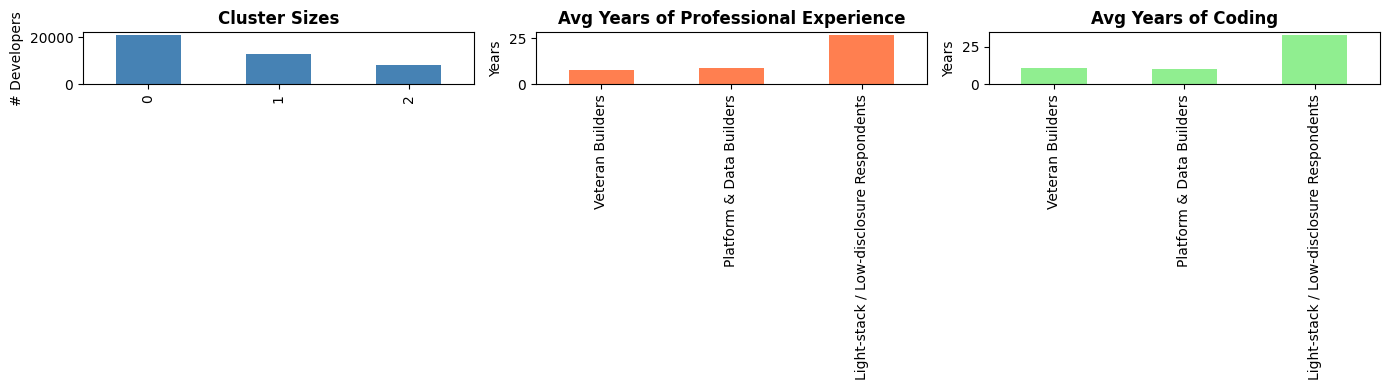

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Chart 1: Cluster sizes
persona[["persona_name", "size"]].plot(kind="bar", ax=axes[0], legend=False, color="steelblue")
axes[0].set_title("Cluster Sizes", fontsize=12, fontweight="bold")
axes[0].set_ylabel("# Developers")
axes[0].set_xlabel("")

# Chart 2: Experience (WorkExp + YearsCode)
persona[["persona_name", "WorkExp"]].set_index("persona_name").plot(kind="bar", ax=axes[1], legend=False, color="coral")
axes[1].set_title("Avg Years of Professional Experience", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Years")
axes[1].set_xlabel("")

# Chart 3: YearsCode
persona[["persona_name", "YearsCode"]].set_index("persona_name").plot(kind="bar", ax=axes[2], legend=False, color="lightgreen")
axes[2].set_title("Avg Years of Coding", fontsize=12, fontweight="bold")
axes[2].set_ylabel("Years")
axes[2].set_xlabel("")

plt.tight_layout()
plt.savefig("results/cluster_summary.png", dpi=300, bbox_inches="tight")
plt.show()
